# Part 3 - Machine learning
Team Members: Sandeep Jala, Konstantinos Sarinopoulos, Ishan Saksena

For Part 3, we are using a merged dataset related to NFL teams, combined with external factors. We have expanded our dataset from the year 2016 to cover the years 1999 to 2020. The primary aim is to develop a predictive model that can forecast the outcomes of NFL games.

The method planned:

Data Preprocessing: Cleaning and transforming the data to make it suitable for modeling. This includes handling missing values, encoding categorical variables, normalizing data, and potentially reducing dimensionality.

Model Selection and Training: Evaluating different machine learning algorithms to find the most effective one for this prediction task. This might include simpler models like logistic regression as well as more complex ones like Random Forest, XGBoost, and ensemble methods.

Model Evaluation and Tuning: Using cross-validation and various metrics (accuracy, precision, recall, F1-score) to assess the performance of the models. Tuning the hyperparameters to optimize the models further.


## Preprocessing Data

Importing the packages to complete the machine learning analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Loading, cleaning, andexploring the data

In [ ]:
data = pd.read_csv('/content/618_project_part2 (1).csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'schedule_date', 'schedule_season',
       'schedule_week', 'schedule_playoff', 'team_home', 'score_home',
       'score_away', 'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium_x', 'stadium_neutral',
       'weather_temperature', 'weather_wind_mph', 'game_id', 'season',
       'game_type', 'week', 'weekday', 'gametime', 'away_score', 'home_score',
       'home_result', 'location', 'roof', 'surface', 'old_game_id',
       'total_score', 'home_win', 'away_win', 'upset_win', 'favorite_win',
       'score_total', 'wind_speed_category', 'temperature_category',
       'Temp_Cat', 'Wind_Cat'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,...,total_score,home_win,away_win,upset_win,favorite_win,score_total,wind_speed_category,temperature_category,Temp_Cat,Wind_Cat
0,0,0,1999-09-12,1999,1,False,ATL,14,17,MIN,...,31,False,True,False,True,31,1,4,60-80,0
1,1,1,1999-09-12,1999,1,False,CHI,20,17,KC,...,37,True,False,True,False,37,2,3,60-80,5-10
2,2,2,1999-09-12,1999,1,False,CLE,0,43,PIT,...,43,False,True,False,True,43,2,4,60-80,5-10
3,3,3,1999-09-12,1999,1,False,GB,28,24,OAK,...,52,True,False,False,True,52,2,3,60-80,5-10
4,4,4,1999-09-12,1999,1,False,IND,31,14,BUF,...,45,True,False,True,False,45,1,4,60-80,0


In [ ]:
# Remove unnecessary columns and direct giveaway features
features_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'score_home', 'score_away', 'away_win',
                   'favorite_win', 'home_result', 'total_score', 'score_total', 'schedule_date',
                   'schedule_playoff', 'game_id', 'old_game_id', 'upset_win', 'home_score', 'away_score','wind_speed_category', 'temperature_category']
data.drop(columns=features_to_drop, inplace= True)

In [ ]:
data.head()

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium_x,stadium_neutral,weather_temperature,...,game_type,week,weekday,gametime,location,roof,surface,home_win,Temp_Cat,Wind_Cat
0,1999,1,ATL,MIN,MIN,-4.0,49.0,Georgia Dome,False,72.0,...,REG,1,Sunday,NaN,Home,dome,astroturf,False,60-80,0
1,1999,1,CHI,KC,KC,-3.0,38.0,Soldier Field,False,68.0,...,REG,1,Sunday,NaN,Home,outdoors,grass,True,60-80,5-10
2,1999,1,CLE,PIT,PIT,-6.0,37.0,FirstEnergy Stadium,False,70.0,...,REG,1,Sunday,NaN,Home,outdoors,grass,False,60-80,5-10
3,1999,1,GB,OAK,GB,-9.0,43.0,Lambeau Field,False,61.0,...,REG,1,Sunday,NaN,Home,outdoors,grass,True,60-80,5-10
4,1999,1,IND,BUF,BUF,-3.0,45.5,RCA Dome,False,72.0,...,REG,1,Sunday,NaN,Home,dome,astroturf,True,60-80,0


In [ ]:
data.describe()

,schedule_season,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,season,week
count,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000
mean,2009.550120,-5.404892,43.354259,60.273777,6.345022,2009.550120,9.503934
std,6.328488,3.422779,5.032305,15.153800,5.280678,6.328488,5.263159
min,1999.000000,-26.500000,30.000000,-6.000000,0.000000,1999.000000,1.000000
25%,2004.000000,-7.000000,40.000000,50.000000,1.000000,2004.000000,5.000000
50%,2010.000000,-4.500000,43.500000,63.000000,6.000000,2010.000000,10.000000
75%,2015.000000,-3.000000,46.500000,72.000000,10.000000,2015.000000,14.000000
max,2020.000000,0.000000,63.500000,97.000000,40.000000,2020.000000,21.000000


Checking for Missing Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_season      5846 non-null   int64  
 1   schedule_week        5846 non-null   object 
 2   team_home            5846 non-null   object 
 3   team_away            5846 non-null   object 
 4   team_favorite_id     5846 non-null   object 
 5   spread_favorite      5846 non-null   float64
 6   over_under_line      5846 non-null   float64
 7   stadium_x            5846 non-null   object 
 8   stadium_neutral      5846 non-null   bool   
 9   weather_temperature  5846 non-null   float64
 10  weather_wind_mph     5846 non-null   float64
 11  season               5846 non-null   int64  
 12  game_type            5846 non-null   object 
 13  week                 5846 non-null   int64  
 14  weekday              5846 non-null   object 
 15  gametime             5588 non-null   o

In [ ]:
data.isnull().sum()

schedule_season          0
schedule_week            0
team_home                0
team_away                0
team_favorite_id         0
spread_favorite          0
over_under_line          0
stadium_x                0
stadium_neutral          0
weather_temperature      0
weather_wind_mph         0
season                   0
game_type                0
week                     0
weekday                  0
gametime               258
location                 0
roof                     0
surface                  0
home_win                 0
Temp_Cat                 0
Wind_Cat                 0
dtype: int64

In [ ]:
data['gametime'].value_counts()

gametime
13:00    2961
16:15     545
16:05     503
16:25     364
20:30     355
20:20     216
20:15     117
09:00     102
20:25      88
16:30      61
20:00      30
12:30      30
18:30      22
16:40      16
16:35      15
13:05      15
17:00      13
20:40      13
15:00      11
15:05      11
19:00      11
16:00       9
09:30       9
13:30       8
18:40       8
22:15       7
19:10       7
22:20       5
21:30       5
12:00       3
18:31       2
19:30       2
18:25       2
16:45       2
15:15       2
15:40       1
19:05       1
21:00       1
19:15       1
22:10       1
18:41       1
16:36       1
20:10       1
18:50       1
14:00       1
21:20       1
23:30       1
19:20       1
21:15       1
18:32       1
18:45       1
22:25       1
20:05       1
Name: count, dtype: int64

Converting and Transforming DateTime Features


Start by converting the 'gametime' column to datetime format for accurate time representation.

Then identifies all datetime columns in X and lists them in datetime_features.

The custom transformer DateTimeToNumeric, which converts datetime columns to numeric format, is then defined and applied to X.

This transformation is necessary for the preprocessing step

In [ ]:
data['gametime'] = pd.to_datetime(data['gametime'], format='%H:%M')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_season      5846 non-null   int64         
 1   schedule_week        5846 non-null   object        
 2   team_home            5846 non-null   object        
 3   team_away            5846 non-null   object        
 4   team_favorite_id     5846 non-null   object        
 5   spread_favorite      5846 non-null   float64       
 6   over_under_line      5846 non-null   float64       
 7   stadium_x            5846 non-null   object        
 8   stadium_neutral      5846 non-null   bool          
 9   weather_temperature  5846 non-null   float64       
 10  weather_wind_mph     5846 non-null   float64       
 11  season               5846 non-null   int64         
 12  game_type            5846 non-null   object        
 13  week                 5846 non-nul

Selecting features and Target Variable

In [ ]:
X = data.drop('home_win', axis=1)
y = data['home_win']

In [ ]:
datetime_features = X.select_dtypes(include=['datetime64[ns]']).columns.tolist()

In [ ]:
class DateTimeToNumeric(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in X.columns:
            if X[col].dtype.kind == 'M':
                X[col] = X[col].view('int64')
        return X

In [ ]:
transformer = DateTimeToNumeric()
X = transformer.transform(X)

Categorical and Numeric Split of the features

In [ ]:
categorical_features = [col for col in X.select_dtypes(include=['object']).columns if col != 'gametime']
print(f"The categorical features are {categorical_features}")
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
print(f"The numerical fetaures are {numerical_features}")

The categorical features are ['schedule_week', 'team_home', 'team_away', 'team_favorite_id', 'stadium_x', 'game_type', 'weekday', 'location', 'roof', 'surface', 'Temp_Cat', 'Wind_Cat']
The numerical fetaures are ['schedule_season', 'spread_favorite', 'over_under_line', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'season', 'week', 'gatetime']


Stratified train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
for col in X_train.select_dtypes(include=['object']).columns:
    train_categories = set(X_train[col].unique())
    test_categories = set(X_test[col].unique())

    # Find categories present in test but not in train
    if not test_categories.issubset(train_categories):
        print(f'Column {col} has unknown categories in test set.')
        unknown_categories = test_categories - train_categories
        print(f'Unknown Categories in {col}: {unknown_categories}')

Column stadium_x has unknown categories in test set.
Unknown Categories in stadium_x: {'State Farm Stadium', 'Alltel Stadium'}
Column gametime has unknown categories in test set.
Unknown Categories in gametime: {'21:00', '18:50', '19:15', '20:10', '15:40', '19:05'}


Create pipeline to clean our data effectively

In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('num_imputer', imputer),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Preprocessing Justification

### 1) Removal of Irrelevant Columns
- First, we removed columns such as `'Unnamed: 0'` and `'Unnamed: 0.1'`.
- Columns like `game_id` and others generated during part 2 of our project for plotting purposes were also removed.

### 2) Missing Values
- Most missing values were filled in the part 2 of the assignment. The column `gametime` still had missing values; after data analysis, we found that most games occurred around the same time and decided to impute with the median. `gametime` was then converted into a numeric value, which might capture trends over time, such as changes in team performance.

### 3) Removal of Giveaway Features
- Some columns in the data directly gave away the outcome of the game, such as `'score_home'`, `'score_away'`, `'away_win'`, `'favorite_win'`, `'home_result'`, `'total_score'`. Since our goal is to predict the game’s result before it is played, we dropped all such future information.

### 4) Scaling
- Scaling was necessary due to the varied scales of features like weather conditions (`wind`, `temperature`) and betting features (`over_under_line`, `spread_favorite`). We also scaled the numerical `gametime` to ensure that all numeric features contribute equally to the model, avoiding biases toward variables with larger magnitudes.

### 5) OneHotEncoding
- OneHotEncoding was applied as it converts categorical variables into a form that ML algorithms can process more effectively, enhancing prediction capabilities.

### 6) Dimensionality reduction
- One-Hot Encoding significantly expanded the feature space, especially due to many categorical variables. PCA was employed later on in our pipeline to reduce this expanded feature space into a smaller set of uncorrelated components, simplifying the model without losing significant informational content.

### 7) Train-Test Split and Handling of Categorical Variables
- We conducted a stratified train-test split with a typical test size of 0.2 and set up cross-validation during our grid search to provide a more robust estimate of the model's performance.
- We examined if any categorical variables in the test set contained values not present in the training set. Notably, there were 2 stadiums that had hosted only one game each, which were ignored by our OneHotEncoder set with `"handle_unknown"` to `"ignore"`.


## Impact Analysis

With our preprocessing, we aimed to mitigate the risk of overfitting and enhance the model’s ability to generalize well to new, unseen data. We scaled numeric features so they contribute equally based on their relevance. The proper encoding of categorical variables ensured that the model treated these variables without assuming any inherent order.

Lastly, we made sure our split was stratified and balanced. This ensures that model evaluation metrics are reliable and that the model’s performance accurately reflects its ability to generalize to unseen data.


## Classification Analysis

### Analytical goal and the rationale behind choosing classification.

The analytical goal of a project is to use machine learning techniques to predict the outcomes of NFL games based on historical and contextual data. The outcome to predict is whether the home team will win or lose a game. This task is approached as a classification problem because each game outcome can be distinctly categorized into one of two classes: 'win' or 'lose'. This classification is based on a comprehensive set of features that capture various aspects of the games, like their settings, and the conditions under which they are played. We also added 2 kinds of data into our model, based on significance established in part 2. We added weather data like wind and temperature, as well as betting data into our model.

Both betting and weather data bring external and environmental perspectives that are not captured by team stats and game history alone. Betting odds encapsulate expert and public expectations, which can be predictive of outcomes beyond basic statistical analysis. Similarly, weather impacts the physical play conditions, which are crucial for outdoor sports like football. This forms the basis of our project: Using factors other than stats alone to predict the game outcome.


### Finetuning Classifiers

### XGBoost Classifier

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
param_grid = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [50, 70, 100],
    'classifier__learning_rate': [0.01, 0.1]
}
# Grid search setup
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

# Calculate metrics
XGBClassifier_accuracy = accuracy_score(y_test, y_pred)
XGBClassifier_precision = precision_score(y_test, y_pred)
XGBClassifier_recall = recall_score(y_test, y_pred)
XGBClassifier_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {XGBClassifier_accuracy}")
print(f"Precision: {XGBClassifier_precision}")
print(f"Recall: {XGBClassifier_recall}")
print(f"F1 Score: {XGBClassifier_f1}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 50}
Best score: 0.7242484217416393
Accuracy: 0.5752136752136752
Precision: 0.5751575157515751
Recall: 0.9623493975903614
F1 Score: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### RandomForest Classifier

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid = {
    'classifier__n_estimators': [300, 100, 500],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [10, 5, 2],
    'classifier__min_samples_leaf': [2, 1, 4],
    'classifier__bootstrap': [True, False]
}

# Grid search setup
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

# Calculate metrics
RandomForest_accuracy = accuracy_score(y_test, y_pred)
RandomForest_precision = precision_score(y_test, y_pred)
RandomForest_recall = recall_score(y_test, y_pred)
RandomForest_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {RandomForest_accuracy}")
print(f"Precision: {RandomForest_precision}")
print(f"Recall: {RandomForest_recall}")
print(f"F1 Score: {RandomForest_f1}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best score: 0.7216252850650525
Accuracy: 0.5948717948717949
Precision: 0.5906488549618321
Recall: 0.9322289156626506
F1 Score: 0.7231308411214954


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Logistic Regression

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(random_state=42))
])

# Define a grid for GridSearch
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__max_iter': [100, 20, 50]
}

# Grid search setup
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

# Calculate metrics
Log_accuracy = accuracy_score(y_test, y_pred)
Log_precision = precision_score(y_test, y_pred)
Log_recall = recall_score(y_test, y_pred)
Log_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {Log_accuracy}")
print(f"Precision: {Log_precision}")
print(f"Recall: {Log_recall}")
print(f"F1 Score: {Log_f1}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Best score: 0.7227460138033548
Accuracy: 0.5683760683760684
Precision: 0.5695538057742782
Recall: 0.9804216867469879
F1 Score: 0.7205312672938572


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## KNN Classifier

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier())
])

# Define a grid for GridSearch
param_grid = {
    'classifier__n_neighbors': [3, 5, 11, 19,25,31],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Grid search setup
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

# Calculate metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 31, 'classifier__weights': 'distance'}
Best score: 0.6900875073440599


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.6076923076923076
Precision: 0.6176808266360505
Recall: 0.8102409638554217
F1 Score: 0.7009771986970683


### Support Vector Classifier

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', SVC())
])

# Define a grid for GridSearch
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__degree': [2, 3],
    'classifier__gamma': ['scale', 'auto']
}

# Grid search setup
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

# Calculate metrics
svc_accuracy = accuracy_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {svc_accuracy}")
print(f"Precision: {svc_precision}")
print(f"Recall: {svc_recall}")
print(f"F1 Score: {svc_f1}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters: {'classifier__C': 1, 'classifier__degree': 3, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}
Best score: 0.7246270716141298


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.5735042735042735
Precision: 0.5714285714285714
Recall: 0.9939759036144579
F1 Score: 0.725673446948873


We define the list of base models for ensemble methods, each configured with specific parameters to optimize performance:

### Voting Classifier

In [ ]:
base_models = [
  ('rf',RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42, bootstrap=True)),
  ('xgb',XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=70, random_state=42)),
  ('logistic', LogisticRegression(C=0.001, max_iter=100, penalty='l2', random_state=42)),
  ('svm', SVC(C=0.01, degree=3, gamma='auto', kernel='poly', random_state=42, probability=True)),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance'))
]

In [ ]:
voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft')

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=0.95)),
                           ('classifier', voting_clf)])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['schedule_season',
                                                   'spread_favorite',
                                                   'over_under_line',
                                                   'stadium_neutral',
                                                   'weather_temperature',
                                                   'weather_wind_mph', 'season',
                                                   'week', 'gatetime']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEn...
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=70,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('logistic',
                                               LogisticRegression(C=0.001,
                                                                  random_state=42)),
                                              ('svm',
                                               SVC(C=0.01, gamma='auto',
                                                   kernel='poly',
                                                   probability=True,
                                                   random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(metric='manhattan',
                                                                    n_neighbors=25,
                                                                    weights='distance'))],
                                  voting='soft'))])

In [ ]:
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Evaluation
vot_accuracy = accuracy_score(y_test, y_pred)
vot_precision = precision_score(y_test, y_pred)
vot_recall = recall_score(y_test, y_pred)
vot_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {vot_accuracy}")
print(f"Precision: {vot_precision}")
print(f"Recall: {vot_recall}")
print(f"F1 Score: {vot_f1}")

Accuracy: 0.5854700854700855
Precision: 0.5811423390752494
Recall: 0.9653614457831325
F1 Score: 0.7255234861346916


### Stacked classifier

In [ ]:
final_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
stack = StackingClassifier(estimators=base_models, final_estimator=final_classifier, cv=5)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stack', StackingClassifier(
        estimators=base_models,
        final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        cv=5
    ))
])

In [ ]:
# Define parameter grid for the final classifier (XGBoost)
param_distributions = {
    'stack__final_estimator__max_depth': [7, 10, 15],
    'stack__final_estimator__learning_rate': [0.01, 0.001],
    'stack__final_estimator__n_estimators': [300, 500],
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=8,
    cv=3,
    scoring='precision',
    verbose=10,
    random_state=42
)

# Fit the grid search to the training data
random_search.fit(X_train, y_train)
# Best parameters and best score
print("Best score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)
y_pred = random_search.predict(X_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 1/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300;, score=0.570 total time=  40.6s
[CV 2/3; 1/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 1/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300;, score=0.582 total time=  40.6s
[CV 3/3; 1/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 1/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=300;, score=0.577 total time=  40.5s
[CV 1/3; 2/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 2/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500;, score=0.580 total time=  39.2s
[CV 2/3; 2/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 2/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500;, score=0.570 total time=  39.4s
[CV 3/3; 2/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 2/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=500;, score=0.581 total time=  54.5s
[CV 1/3; 3/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 3/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300;, score=0.615 total time=  39.3s
[CV 2/3; 3/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 3/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300;, score=0.600 total time=  37.7s
[CV 3/3; 3/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 3/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=300;, score=0.619 total time=  36.5s
[CV 1/3; 4/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 4/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.572 total time=  37.4s
[CV 2/3; 4/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 4/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.571 total time=  37.2s
[CV 3/3; 4/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 4/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.571 total time=  37.8s
[CV 1/3; 5/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 5/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.589 total time=  38.7s
[CV 2/3; 5/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 5/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.602 total time=  39.3s
[CV 3/3; 5/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 5/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.616 total time=  39.0s
[CV 1/3; 6/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 6/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.603 total time=  37.5s
[CV 2/3; 6/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 6/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.588 total time=  40.2s
[CV 3/3; 6/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 6/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=10, stack__final_estimator__n_estimators=300;, score=0.617 total time=  37.8s
[CV 1/3; 7/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 7/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500;, score=0.614 total time=  36.3s
[CV 2/3; 7/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 7/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500;, score=0.600 total time=  37.8s
[CV 3/3; 7/8] START stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 7/8] END stack__final_estimator__learning_rate=0.01, stack__final_estimator__max_depth=7, stack__final_estimator__n_estimators=500;, score=0.619 total time=  39.2s
[CV 1/3; 8/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3; 8/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.583 total time=  42.5s
[CV 2/3; 8/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3; 8/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.586 total time=  41.5s
[CV 3/3; 8/8] START stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/3; 8/8] END stack__final_estimator__learning_rate=0.001, stack__final_estimator__max_depth=15, stack__final_estimator__n_estimators=500;, score=0.588 total time=  40.7s
Best score: 0.6114499452084232
Best parameters: {'stack__final_estimator__n_estimators': 300, 'stack__final_estimator__max_depth': 7, 'stack__final_estimator__learning_rate': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Evaluation
stack_accuracy = accuracy_score(y_test, y_pred)
stack_precision = precision_score(y_test, y_pred)
stack_recall = recall_score(y_test, y_pred)
stack_f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {stack_accuracy}")
print(f"Precision: {stack_precision}")
print(f"Recall: {stack_recall}")
print(f"F1 Score: {stack_f1}")

Accuracy: 0.6051282051282051
Precision: 0.6145124716553289
Recall: 0.8162650602409639
F1 Score: 0.7011642949547219


In [ ]:
scores = {
    "Model": ["XGB", "RF", "Logistic", "KNN", "SVC", "Voting", "Stacking"],
    "Precision": [XGBClassifier_precision, RandomForest_precision, Log_precision, knn_precision, svc_precision, vot_precision, stack_precision],
    "Recall": [XGBClassifier_recall, RandomForest_recall, Log_recall, knn_recall, svc_recall, vot_recall, stack_recall],
    "F1 Score": [XGBClassifier_f1, RandomForest_f1, Log_f1, knn_f1, svc_f1, vot_f1, stack_f1]
}

scores_df = pd.DataFrame(scores)
print(scores_df)

      Model  Precision    Recall  F1 Score
0       XGB   0.575158  0.962349  0.720000
1        RF   0.590649  0.932229  0.723131
2  Logistic   0.569554  0.980422  0.720531
3       KNN   0.617681  0.810241  0.700977
4       SVC   0.571429  0.993976  0.725673
5    Voting   0.581142  0.965361  0.725523
6  Stacking   0.614512  0.816265  0.701164


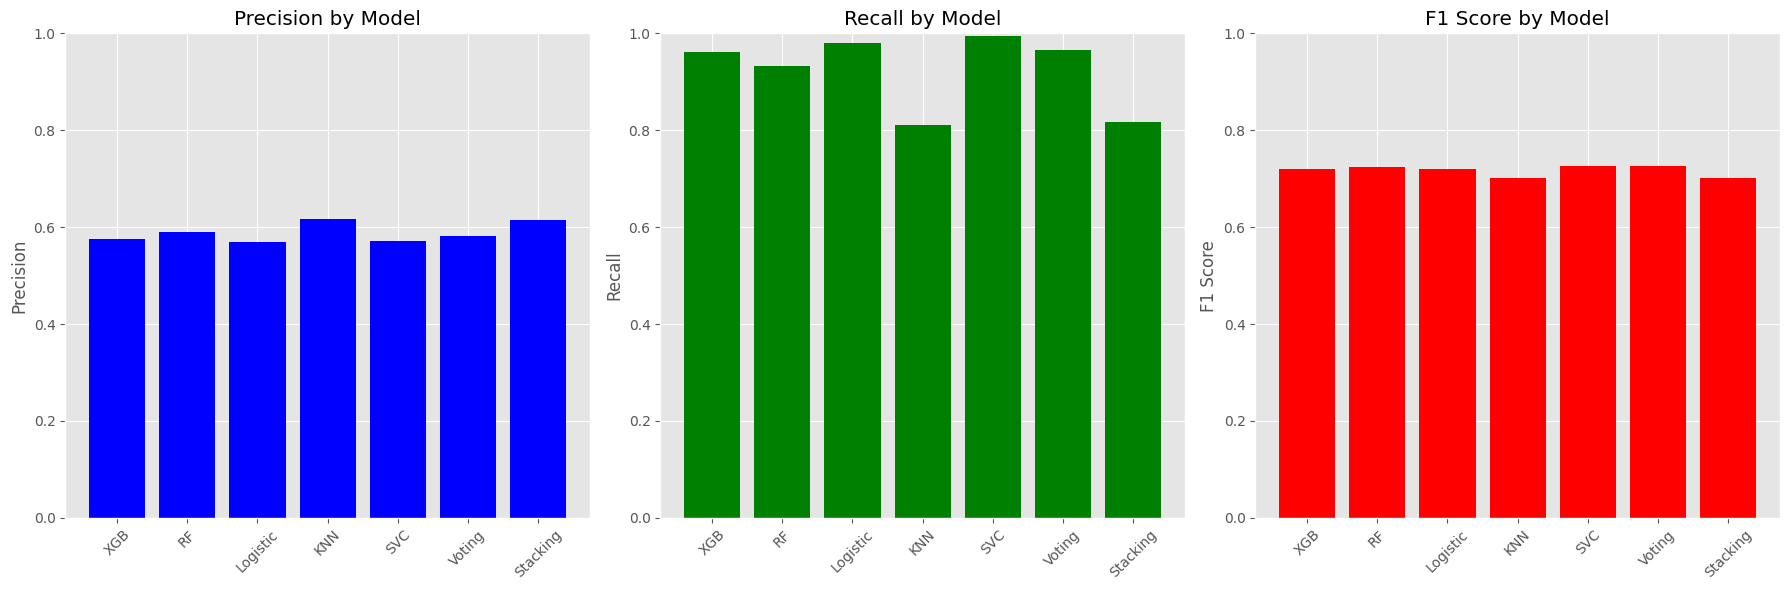

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Precision
ax[0].bar(scores_df['Model'], scores_df['Precision'], color='b')
ax[0].set_title('Precision by Model')
ax[0].set_ylabel('Precision')
ax[0].set_ylim([0, 1])
ax[0].tick_params(axis='x', rotation=45)

# Bar plot for Recall
ax[1].bar(scores_df['Model'], scores_df['Recall'], color='g')
ax[1].set_title('Recall by Model')
ax[1].set_ylabel('Recall')
ax[1].set_ylim([0, 1])
ax[1].tick_params(axis='x', rotation=45)

# Bar plot for F1 Score
ax[2].bar(scores_df['Model'], scores_df['F1 Score'], color='r')
ax[2].set_title('F1 Score by Model')
ax[2].set_ylabel('F1 Score')
ax[2].set_ylim([0, 1])
ax[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Interpretation

The models demonstrate consistent performance across precision, recall, and F1 score metrics, indicating a balanced approach to both precision and recall. This balanced performance is reflected in the uniformly high recall rates across all classifiers, signifying their effectiveness in correctly identifying most of the positive cases (Wins).

The similarity in the height of the F1 score bars across different models points to a consistent balance between false positives and false negatives. This indicates that none of the models disproportionately favors false positives over false negatives, or vice versa.

Interestingly, the ensemble methods do not show a significant improvement over individual models. This could suggest that the base models are already performing near their maximum potential given the current features and dataset.

Choosing the best model is challenging as they all exhibit comparable scores. The voting classifier slightly outperforms others, but only by a narrow margin. This observation implies that the current models may have reached a performance limit with the existing features, and only marginal improvements are achievable with more complex ensembles.

The high recall also suggests minimal information loss during the PCA process, indicating that the dimensionality reduction did not significantly detract from the models’ ability to capture and predict positive outcomes effectively.


## Discussion of Results

Using various machine learning models has produced a range of insights into how different approaches compare in terms of precision, recall, and F1 scores for this task. Here’s a discussion of the results:

### Overview of Model Performance

•	Consistent Recall: Across the board, recall scores are high, which indicates that all models are particularly effective at identifying true positives (i.e., correct predictions of wins). High recall is crucial in scenarios where missing out on predicting a win could be costly, such as in betting or strategic team planning.

•	Variability in Precision and F1 Scores: Precision and F1 scores vary more across models, suggesting differences in how well each model avoids false positives (incorrect win predictions). The F1 score, which balances precision and recall, doesn't show dramatic differences between models but still provides a good basis for comparison.

### Detailed Analysis

•	XGBoost Classifier: Exhibits solid performance but not outstanding in any specific metric. It has a moderate balance between identifying wins and avoiding false positives.

•	Random Forest Classifier: Similar to XGBoost, but slightly better in avoiding false positives, as indicated by a marginally higher precision score.

•	Logistic Regression: Has the highest recall, which suggests it is best at identifying all positive cases but at the cost of higher false positives, as indicated by lower precision.

•	KNN Classifier: Shows a moderate balance with somewhat better precision than some other models, suggesting it makes fewer false positive errors relative to its recall.

•	SVC (Support Vector Classifier): Remarkably high in recall almost perfect, suggesting it nearly always predicts wins when they occur, but its precision is not as high, leading to a considerable number of false positives.

•	Voting Classifier: This ensemble method does not significantly outperform individual models, which might indicate that the combination of models does not provide additional value over single models in this setup. However, this gave one of the best results.

•	Stacking Classifier: Performs comparably to other ensemble methods, with no significant advantage, suggesting that complexity added by stacking may not be justified given the similar performance levels. It is to be noted that this was scored on precision not f1.

While all models perform well in terms of recall, there is room to improve precision. The relatively similar performance across different model architectures suggests that the next steps could focus more on enhancing the feature set or adding more data and possibly simplifying the model approach.


## Conclusion:

We reach the end of Part 3 of our project. We tested various models, achieving high recall across all, indicating strong capability to identify wins correctly. We were able to achieve F1 scores of up to 0.73 after utilizing GridSearchCV. Future work could include getting more data: Investigating additional features such as player-level statistics, more detailed team form metrics, etc.

In conclusion, the project successfully demonstrated the feasibility of using machine learning to predict NFL game outcomes by using factors other than stats alone. As the models are refined and features are expanded, the predictive capabilities can be expected to improve: with potential usage in sports analytics.